In [2]:
import pickle
import networkx as nx
import pandas as pd
import urllib
# z = pickle.load(open('./string_alignment.pkl', 'rb'))
from urllib.parse import urlparse

text_to_outlet = {}
outlet_info = {}
domain_info = {}
prefixes = ['california', 'florida', 'illinois', 'ohio', 'newyork', 'nytimes_foxnews', 'texas',]
for prefix in prefixes:
    try:
        df = pd.read_csv(prefix + '_article_texts_and_info_dedup_without_national_outlets.csv')
        for idx, row in df.iterrows():
            outlet_info[row['media_name']] = prefix
            domain = urlparse(row['url']).netloc
            domain_info[domain] = prefix
            if row['text'] in text_to_outlet:
                text_to_outlet[row['text']] = text_to_outlet[row['text']] + [row['media_name']]
            else:
                text_to_outlet[row['text']] = [row['media_name']]
    except FileNotFoundError:
        df = pd.read_csv(prefix + '_article_texts_and_info_dedup.csv')
        for idx, row in df.iterrows():
            outlet_info[row['media_name']] = row['media_name']
            domain = urlparse(row['url']).netloc
            domain_info[domain] = row['media_name']
            if row['text'] in text_to_outlet:
                text_to_outlet[row['text']] = text_to_outlet[row['text']] + [row['media_name']]
            else:
                text_to_outlet[row['text']] = [row['media_name']]
    

In [26]:
# z = pickle.load(open('./string_alignment.pkl', 'rb'))

[]

,Unnamed: 0,media_name,publish_date,title,url,subtitle,text,sent_count,domain
1784,1815,Texas Jewish Post,2023-06-29 02:37:18,Makom Shelanu cofounder heads to rabbinical sc...,https://tjpnews.com/makom-shelanu-cofounder-he...,By Michael Sudhalter puckmaren glass will have...,Photos: Courtesy puck glass\n\nFull of pride a...,49,tjpnews.com


In [34]:
{k: v for k, v in text_to_outlet.items() if 'Texas Jewish Post' in v}

{'By Cantor Sheri Allen\n\nAdvocacy was high on the priority list in March for Makom Shelanu Congregation in Fort Worth and Beth El Binah in Dallas. Representing both congregations, I, puck glass, Richard Allen and Cantor Don Croll woke up at the crack of dawn on March 8 to drive to the State Capitol for TENT’s (Transgender Education Network of Texas) Advocacy Day in Austin.\n\nThe goal was to help persuade legislators to vote against the 140 anti-LGBTQ+ bills filed this session. If passed into law, these bills, covering issues such as healthcare, education, identity documents and religious refusal would pose a real and serious threat to the lives and well-being of the LGBTQ+ (and especially transgender) community. We know personally of families moving out of state to avoid investigation, separation from their children and potential prosecution for simply supporting their loved ones’ desire to live authentically and receive basic healthcare.\n\nOur contingent spent the day learning abo

In [35]:
G = nx.Graph()

for txt, outlets in text_to_outlet.items():
    if len(outlets) > 1:
        for outlet1 in list(set(outlets)):
            for outlet2 in list(set(outlets)):
                if outlet1 != outlet2:
                    G.add_edge(outlet1, outlet2, dist_list=[150])
                    
for k, v in z.items():
    for kv, vv in v.items():
        if vv < 151:
            if vv == 0:
                continue
            else:
                try:
                    outlets1 = text_to_outlet[k]
                except KeyError:
                    continue
                try:
                    outlets2 = text_to_outlet[kv]
                except KeyError:
                    continue
                for outlet1 in outlets1:
                    for outlet2 in outlets2:
                        if outlet1 == outlet2:
                            continue
                        data = G.get_edge_data(outlet1, outlet2, default={'dist_list': []})['dist_list']
                        if data == []:
                            G.add_edge(outlet1, outlet2, dist_list=[vv])
                        else:
                            G.edges[outlet1, outlet2].update({'dist_list': data + [150 - vv]})

In [50]:
import numpy as np
for e in G.edges:
    print(e)
    dist = G.get_edge_data(e[0], e[1])['dist_list']
    G.edges[e[0], e[1]].update({'weight': np.mean(dist)})
    G.edges[e].update({'dist_list': 0})
    
for node in G.nodes:
    G.nodes[node].update({'dset': outlet_info[node]})

('New York Times', 'Useful Links - New York Times Newsroom Guide to Useful Web Sites')
('New York Times', 'http://www.hoffmania.com/')
('New York Times', ' The Caucus - New York Times Political Blog')
('New York Times', 'Austin American-Statesman ')
('wesh.com', 'wlwt.com')
('wesh.com', 'NBC 5')
('wesh.com', 'kcra.com')
('wesh.com', 'ksbw.com')
('wlwt.com', 'NBC 5')
('wlwt.com', 'kcra.com')
('wlwt.com', 'wpbf.com')
('wlwt.com', 'ksbw.com')
('NBC 5', 'kcra.com')
('NBC 5', 'wpbf.com')
('NBC 5', 'ksbw.com')
('kcra.com', 'wpbf.com')
('kcra.com', 'ksbw.com')
('news10.net', 'kagstv.com')
('news10.net', 'cbs19.tv')
('news10.net', 'wtsp.com')
('news10.net', 'WKYC NBC')
('news10.net', 'wgrz.com')
('news10.net', 'firstcoastnews.com')
('news10.net', 'khou.com')
('news10.net', 'kvue.com')
('news10.net', '12newsnow.com')
('news10.net', 'kiiitv.com')
('news10.net', 'WFAA ABC')
('news10.net', 'newswest9.com')
('kagstv.com', 'wgrz.com')
('kagstv.com', 'WKYC NBC')
('kagstv.com', 'wtsp.com')
('cbs19.tv'

In [51]:
nx.write_gexf(G, "outlet_similarity_not_messed_up.gexf")

In [64]:
pickle.dump(G, open('outlet_similarity_not_messed_up.pkl', 'wb'))

In [52]:
prefixes_new = ['california', 'florida', 'illinois', 'ohio', 'newyork', 'texas', 'New York Times', 'Fox News', ]
collection_edges = {prefix1: {prefix2: [] for prefix2 in prefixes_new} for prefix1 in prefixes_new}
for edge in G.edges:
    print(G.get_edge_data(edge[0], edge[1])['dist_list'])
    print(outlet_info[edge[0]])
    print(outlet_info[edge[1]])
    print(collection_edges[outlet_info[edge[0]]][outlet_info[edge[1]]])
    dist_list = G.get_edge_data(edge[0], edge[1])['dist_list']
    if type(dist_list) != list:
        dist_list = [dist_list]
    collection_edges[outlet_info[edge[0]]][outlet_info[edge[1]]] += dist_list
    

0
New York Times
california
[]
0
New York Times
california
[0]
0
New York Times
california
[0, 0]
0
New York Times
texas
[]
0
florida
ohio
[]
0
florida
newyork
[]
0
florida
california
[]
0
florida
california
[0]
0
ohio
newyork
[]
0
ohio
california
[]
0
ohio
florida
[]
0
ohio
california
[0]
0
newyork
california
[]
0
newyork
florida
[]
0
newyork
california
[0]
0
california
florida
[]
0
california
california
[]
0
california
texas
[]
0
california
texas
[0]
0
california
florida
[0]
0
california
ohio
[]
0
california
newyork
[]
0
california
florida
[0, 0]
0
california
texas
[0, 0]
0
california
texas
[0, 0, 0]
0
california
texas
[0, 0, 0, 0]
0
california
texas
[0, 0, 0, 0, 0]
0
california
texas
[0, 0, 0, 0, 0, 0]
0
california
texas
[0, 0, 0, 0, 0, 0, 0]
0
texas
newyork
[]
0
texas
ohio
[]
0
texas
florida
[]
0
texas
florida
[0]
0
texas
ohio
[0]
0
texas
florida
[0, 0]
0
texas
california
[]
0
texas
newyork
[0]
0
florida
ohio
[0]
0
florida
newyork
[0]
0
florida
texas
[]
0
florida
california
[0, 0]


In [62]:
mtx = np.zeros((8, 8))
for idx1, tup1 in enumerate(collection_edges.items()):
    prefix1, v = tup1
    for idx2, tup2 in enumerate(v.items()):
        prefix2, ls = tup2
        if len(ls) == 0:
            mtx[idx1, idx2] = np.nan
        else:
            mtx[idx1, idx2] = np.mean([l for l in ls]) 

<AxesSubplot:>

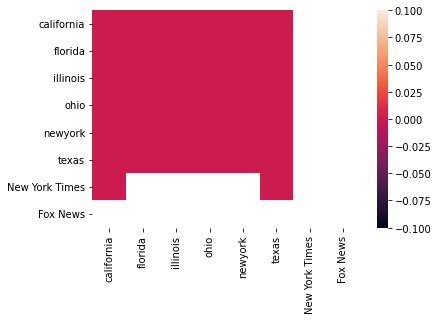

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(mtx, xticklabels=prefixes_new, yticklabels=prefixes_new)


In [65]:
for idx, comp in enumerate(nx.connected_components(G)):
    my_subgraph = G.subgraph(list(comp))
    nx.write_gexf(my_subgraph, "subgraph_{}.gexf".format(str(idx)))

In [135]:
outlet_to_scores = pickle.load(open('our_domains.pkl', 'rb'))

In [146]:
prefix_to_score = {pr: [] for pr in prefixes_new}
for outlet, val in outlet_to_scores.items():
    pr = domain_info.get('www.' + outlet, domain_info.get(outlet, domain_info.get(outlet[4:])))

    print(outlet)
    print(pr)
    if val != 0 and pr is not None:
        prefix_to_score[pr] = prefix_to_score[pr] + [val]

www.wbtai.com
newyork
www.independent.com
california
www.oberlinreview.org
ohio
www.pix11.com
newyork
www.nbclosangeles.com
california
www.houstonpublicmedia.org
texas
www.chicagodefender.com
illinois
www.lbpost.com
california
www.news4usonline.com
california
www.nbc4i.com
ohio
www.sgvtribune.com
california
www.irishexaminerusa.com
newyork
www.cincinnatimagazine.com
ohio
www.palmspringslife.com
california
www.1150wima.iheart.com
None
www.biscaynetimes.com
florida
www.jewishpress.com
newyork
www.dvcinquirer.com
california
www.kmjnow.com
california
www.berkeleyside.org
california
www.progressive.org
california
www.gardenavalleynews.org
california
www.dailyfreeman.com
newyork
www.enewspf.com
illinois
www.dailytrib.com
texas
www.eccunion.com
california
www.cityandstateny.com
newyork
www.nyc.streetsblog.org
california
www.tomdispatch.com
california
www.idyllwildtowncrier.com
california
www.sbsun.com
california
www.inlandvalleynews.com
california
www.wylienews.com
texas
www.mountvernonnews.c

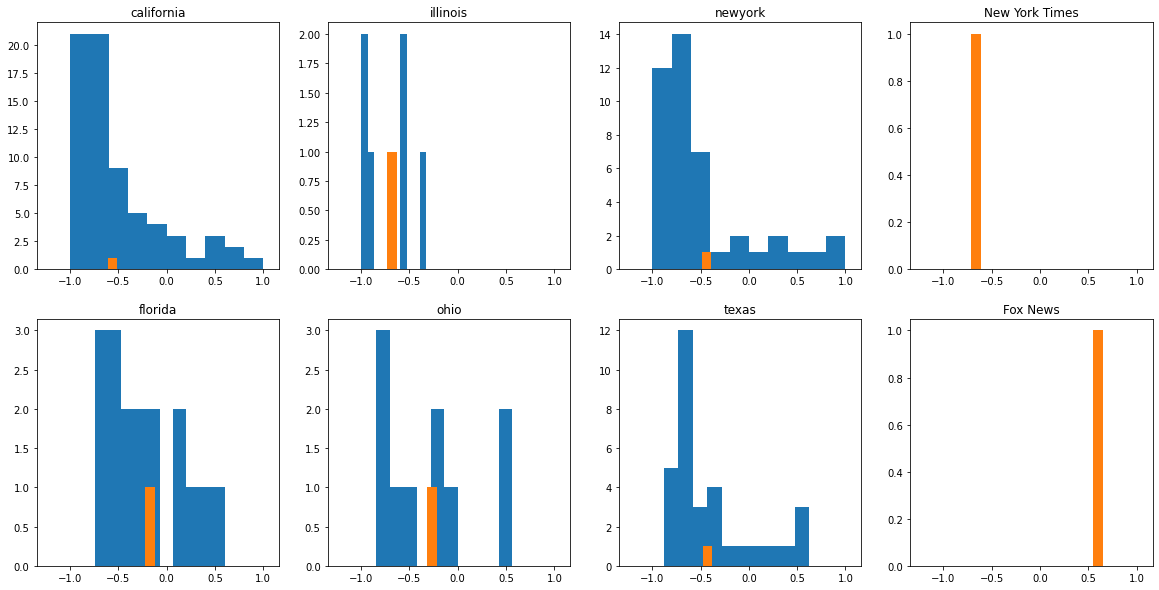

In [171]:
fig, ax = plt.subplots(2, 4 , sharex=True)
plt.rcParams["figure.figsize"] = (20,10)
idx = 0
for pr, k in prefix_to_score.items():
    k = [val for val in k if val == val]
    ax[idx % 2, int(idx / 2)].hist(k, label='distribution')
    ax[idx % 2, int(idx / 2)].set_title(pr)
    
    ax[idx % 2, int(idx / 2)].hist([np.mean(k)], label='mean value')
    ax[idx % 2, int(idx / 2)].tick_params(axis = 'both', labelbottom=True)
    idx += 1


In [134]:
'www.portisabelsouthpadre.com'[:4]

'www.'